Word Meaning 

Corpus: 

a collection of written or spoken material in machine-readable form, assembled for the purpose of linguistic research.

In [ ]:
# https://machinelearningmastery.com/deep-learning-bag-of-words-model-sentiment-analysis/

import pandas as pd
import string

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords
stopwords.words('english')[0:10]

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Loading and Cleaning Reviews

* Split tokens on white space.
* Remove all punctuation from words.
* Remove all words that are not purely comprised of alphabetical characters.
* Remove all words that are known stop words.
* Remove all words that have a length <= 1 character.

In [2]:
def load_doc(filename):
	file = open(filename, 'r')
	text = file.read()
	file.close()
	return text


# turn a doc into clean tokens
def clean_doc(doc):

    # split into tokens by white space
	tokens = doc.split()

    # remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]

    # remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]

    # filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]

    # filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

# Define a Vocabulary

It is important to define a vocabulary of known words when using a bag-of-words.

We can develop a vocabulary as a Counter, which is a dictionary mapping of words and their counts that allow us to easily update and query.

Each document can be added to the counter (a new function called add_doc_to_vocab()) and we can step over all of the reviews in the negative directory and then the positive directory (a new function called process_docs()).

In [ ]:
#load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
	# load doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# update counts
	vocab.update(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_trian):
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if is_trian and filename.startswith('cv9'):
			continue
		if not is_trian and not filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# add doc to vocab
		add_doc_to_vocab(path, vocab)

# TF-IDF

TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. 

This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

Most importantly in automated text analysis, and is very useful for scoring words in NLP.

TF-IDF was invented for document search and information retrieval. It works by increasing proportionally to the number of times a word appears in a document, but is offset by the number of documents that contain the word. So, words that are common in every document, such as this, what, and if, rank low even though they may appear many times, since they don’t mean much to that document in particular.

## How is TF-IDF calculated?

* The term frequency of a word in a document. There are several ways of calculating this frequency, with the simplest being a raw count of instances a word appears in a document. Then, there are ways to adjust the frequency, by length of a document, or by the raw frequency of the most frequent word in a document.

* The inverse document frequency of the word across a set of documents. This means, how common or rare a word is in the entire document set. The closer it is to 0, the more common a word is. This metric can be calculated by taking the total number of documents, dividing it by the number of documents that contain a word, and calculating the logarithm.


## Why is TF-IDF used in Machine Learning?

NLP is faced with one major hurdle – its algorithms usually deal with numbers, and natural language is, well, text. So we need to transform that text into numbers, otherwise known as *text vectorization*. 
It’s a fundamental step in the process of machine learning for analyzing text, and different vectorization algorithms will drastically affect end results, so you need to choose one that will deliver the results you’re hoping for.

Once you’ve transformed words into numbers, in a way that’s machine learning algorithms can understand, then TF-IDF score can be fed to algorithms such as Naive Bayes and SVM, greatly improving the results of more basic methods like word counts.

## Why does this work? 

Simply put, a word vector represents a document as a list of numbers, with one for each possible word of the corpus. Vectorizing a document is taking the text and creating one of these vectors, and the numbers of the vectors somehow represent the content of the text. TF-IDF enables us to gives us a way to associate each word in a document with a number that represents how relevant each word is in that document. Then, documents with similar, relevant words will have similar vectors, which is what we are looking for in a machine learning algorithm.

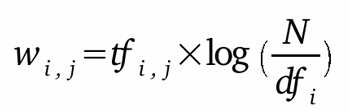

## Applications of TF-IDF

Determining how relevant a word is to a document, or TD-IDF, is useful in many ways, for example:

* Information retrieval

TF-IDF was invented for document search and can be used to deliver results that are most relevant to what you’re searching for. Imagine you have a search engine and somebody looks for LeBron. The results will be displayed in order of relevance. That’s to say the most relevant sports articles will be ranked higher because TF-IDF gives the word LeBron a higher score.

* Keyword Extraction

TF-IDF is also useful for extracting keywords from text. How? The highest scoring words of a document are the most relevant to that document, and therefore they can be considered keywords for that document. Pretty straightforward.

## Conclusion:

It’s useful to understand how TF-IDF works so that you can gain a better understanding of how machine learning algorithms function. While machine learning algorithms traditionally work better with numbers, TF-IDF algorithms help them decipher words by allocating them a numerical value or vector. This has been revolutionary for machine learning, especially in fields related to NLP such as text analysis.

In text analysis with machine learning, TF-IDF algorithms help sort data into categories, as well as extract keywords. This means that simple, monotonous tasks, like tagging support tickets or rows of feedback and inputting data can be done in seconds.

In [2]:
# NOthing Here

# Scikit-Learn’s Vectorizers

https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af

 In order to make documents’ corpora more palatable for computers, they must first be converted into some numerical structure. There are a few techniques used to achieve that, but here we focuses on 
 
 * Vector Space models a.k.a. Bag-of-Words (BoW) models
Steps are:

1. Splitting the documents into tokens by following some sort of pattern.
2. Assigning a weight to each token proportional to the frequency with which it shows up in the document and/or corpora.
3. Creating a document-term matrix with each row representing a document and each column addressing a token.

Types:

1. Count Vectorizer : it counts the number of times a token shows up in the document and uses this value as its weight.

2. TF-IDF Vectorizer: **TF-IDF** stands for “term frequency-inverse document frequency”, meaning the weight assigned to each token not only depends on its frequency in a document but also how recurrent that term is in the entire corpora.